<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Seaborn_Analyse_de_corr%C3%A9lation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

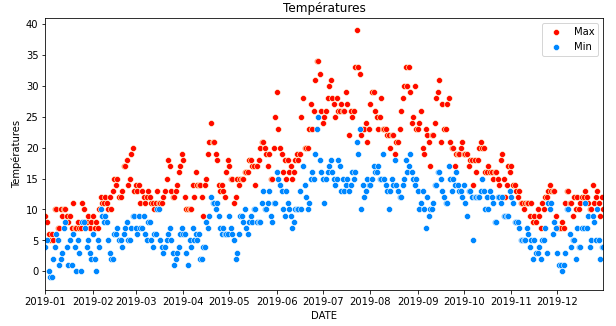


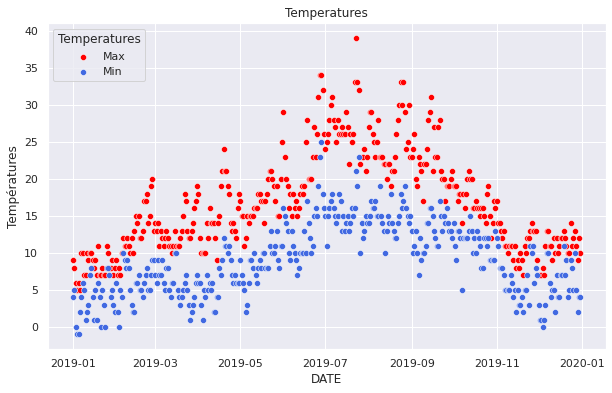

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

df_weather_date = pd.to_datetime(df_weather['DATE'])

sns.scatterplot(data = df_weather, x = df_weather_date, y = "MAX_TEMPERATURE_C", color='red', label='Max')
sns.scatterplot(data = df_weather, x = df_weather_date, y = "MIN_TEMPERATURE_C", color='royalblue', label='Min')
sns.set(rc = {'figure.figsize':(8,6)})
plt.ylabel('Températures')
plt.title('Temperatures')
plt.legend(title= 'Temperatures',loc = "upper left") 
plt.show()

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

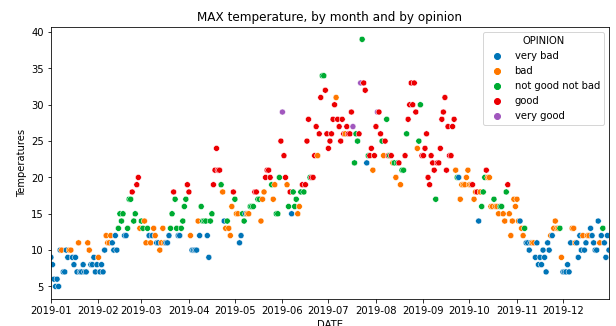

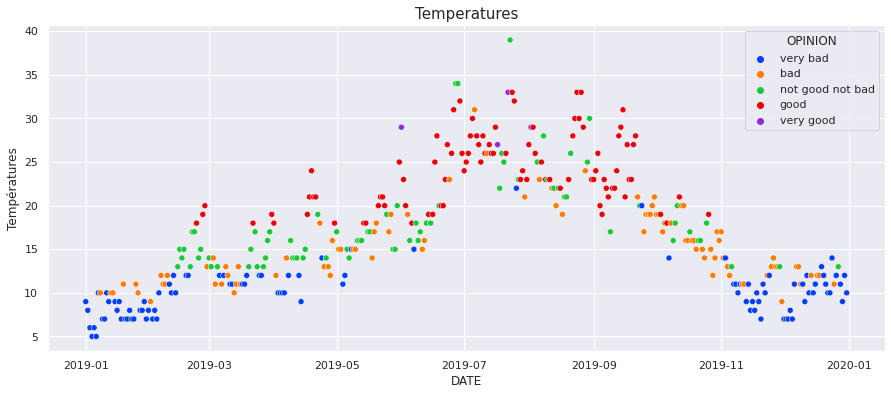

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

df_weather_date = pd.to_datetime(df_weather['DATE'])

sns.scatterplot(data=df_weather, x=df_weather_date, y="MAX_TEMPERATURE_C", hue="OPINION", palette="bright" )
plt.ylabel('Températures')
plt.title('Temperatures', size = 15)
plt.show()



## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

In [ ]:
#afficher le dataset.corr
df_weather.corr()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
MAX_TEMPERATURE_C,1.000000,0.876892,-0.114510,0.825536,0.975441,0.976796,-0.210704,-0.702905,0.102422,-0.004506,-0.457853,0.993324,0.826719,0.941037,-0.190506,-0.191807,-0.301603,NaN,0.404340,0.690323,0.196215,0.123811
MIN_TEMPERATURE_C,0.876892,1.000000,0.116357,0.950702,0.888389,0.850258,-0.023004,-0.526656,-0.013555,-0.185420,-0.130853,0.880895,0.875856,0.946671,0.014212,0.057358,-0.139955,NaN,0.379809,0.471559,0.283569,0.120233
WINDSPEED_MAX_KMH,-0.114510,0.116357,1.000000,0.189827,-0.053186,-0.121643,0.394238,0.007739,-0.041671,-0.376733,0.387952,-0.110249,0.056339,-0.000797,0.325675,0.423772,0.281717,NaN,-0.042091,-0.226626,0.169456,-0.083761
TEMPERATURE_MORNING_C,0.825536,0.950702,0.189827,1.000000,0.874102,0.814347,0.048650,-0.455566,-0.020284,-0.250654,-0.039091,0.824918,0.882306,0.924278,0.099342,0.132621,-0.096331,NaN,0.343759,0.407663,0.343293,0.121388
TEMPERATURE_NOON_C,0.975441,0.888389,-0.053186,0.874102,1.000000,0.973353,-0.175838,-0.673392,0.083209,-0.060409,-0.375154,0.963276,0.841095,0.953704,-0.146048,-0.144571,-0.235171,NaN,0.408798,0.657113,0.213586,0.112144
TEMPERATURE_EVENING_C,0.976796,0.850258,-0.121643,0.814347,0.973353,1.000000,-0.209041,-0.676409,0.096888,0.004110,-0.429395,0.963253,0.807732,0.912310,-0.196340,-0.186346,-0.294992,NaN,0.398019,0.678705,0.170397,0.124853
PRECIP_TOTAL_DAY_MM,-0.210704,-0.023004,0.394238,0.048650,-0.175838,-0.209041,1.000000,0.265536,-0.172711,-0.468712,0.456302,-0.206429,-0.003174,-0.111031,0.411905,0.513442,0.372366,NaN,-0.113279,-0.349541,0.133670,-0.038824
HUMIDITY_MAX_PERCENT,-0.702905,-0.526656,0.007739,-0.455566,-0.673392,-0.676409,0.265536,1.000000,-0.210210,-0.009099,0.541100,-0.692777,-0.344208,-0.613490,0.210244,0.283311,0.286082,NaN,-0.380635,-0.627440,-0.151859,-0.016809
VISIBILITY_AVG_KM,0.102422,-0.013555,-0.041671,-0.020284,0.083209,0.096888,-0.172711,-0.210210,1.000000,0.140802,-0.331651,0.096070,-0.018760,0.031536,-0.158440,-0.176006,-0.139516,NaN,-0.035014,0.295531,-0.124253,0.050955
PRESSURE_MAX_MB,-0.004506,-0.185420,-0.376733,-0.250654,-0.060409,0.004110,-0.468712,-0.009099,0.140802,1.000000,-0.444519,-0.003728,-0.141155,-0.129409,-0.410147,-0.438912,-0.392729,NaN,-0.017744,0.216754,-0.347326,0.012966


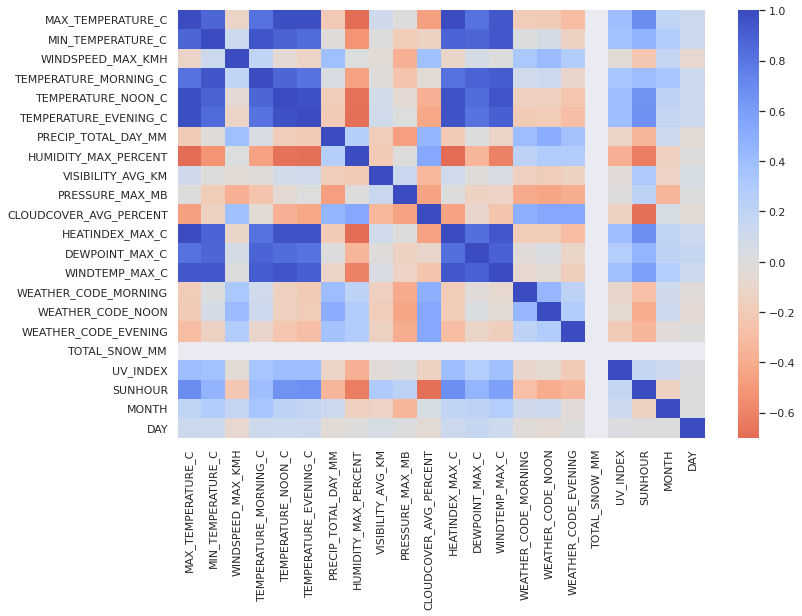

In [ ]:
# It's your turn now :

# taille
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(30*cm, 20*cm))

#graph heatmap
sns.heatmap(df_weather.corr(), cmap='coolwarm_r', center=0) #0 sur le centre de la palette 



## Mes observations
####Les colonnes qui cont corrélées avec Max Temperature sont :
- Min Temperature => Positively
-Windspeed Max => Negatively
-Temperature Noon => Positively
-Temperature Evening => Positively
-Humidity Max Percent => Negatively
-Cloudcover AVG percent => Negatively
-Heatindex Max C => Positively
-Windtemp Max => Positively
-Weather Code Evening => Negatively


##### Corrélations négatives : C'est logique quand le vent est plus fort la temp max baisse, idem pour l'humidté, la couverture nuageuse, la temperature à midi. 
Corrélations positives : Il n'y a pas non plus de vent quand les temp. augmentent, pas ou peu d'humidité, couverture nuageuse faible



## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [ ]:
# It's your turn:

#rappel dataset
df_weather.head(10)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5
5,2019-01-06,5,2,7,2,4,4,0.0,87,7.375,1039,70.500,5,3,1,116,122,122,0,1,3.3,very bad,1,6
6,2019-01-07,10,4,9,4,8,8,0.0,95,5.000,1039,71.125,10,7,3,143,143,116,0,1,5.1,very bad,1,7
7,2019-01-08,10,6,18,6,10,8,0.2,93,8.625,1036,72.000,10,8,5,143,176,176,0,1,3.3,bad,1,8
8,2019-01-09,7,5,18,4,7,6,0.0,83,9.000,1031,66.000,7,4,3,143,122,119,0,1,3.3,very bad,1,9
9,2019-01-10,7,1,14,1,5,5,0.1,93,8.000,1031,33.625,7,2,-2,143,116,176,0,1,8.7,very bad,1,10


In [ ]:
#création d'un tableau avec 9 colonnes 

df_weather1 = df_weather.iloc[:, :9]
df_weather1


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT
0,2019-01-01,9,4,10,4,7,8,0.2,94
1,2019-01-02,8,5,18,7,7,5,0.0,90
2,2019-01-03,6,0,18,0,4,3,0.0,88
3,2019-01-04,5,-1,15,-1,4,3,0.0,91
4,2019-01-05,6,-1,8,-1,4,3,0.0,91
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96
361,2019-12-28,11,5,12,7,8,8,0.0,93
362,2019-12-29,9,2,11,3,6,7,0.0,86
363,2019-12-30,12,4,7,5,9,9,0.0,61


In [ ]:
# isolation de la colonne OPINIONS

df_weather_opinions = df_weather.loc[:,'OPINION']
df_weather_opinions

0              very bad
1              very bad
2              very bad
3              very bad
4              very bad
             ...       
360    not good not bad
361            very bad
362            very bad
363            very bad
364            very bad
Name: OPINION, Length: 365, dtype: object

In [ ]:
#jointure des deux tableaux

df_weather_graph = df_weather1.join(df_weather_opinions) # 365 rows × 21 columns
df_weather_graph

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,OPINION
0,2019-01-01,9,4,10,4,7,8,0.2,94,very bad
1,2019-01-02,8,5,18,7,7,5,0.0,90,very bad
2,2019-01-03,6,0,18,0,4,3,0.0,88,very bad
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,very bad
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,very bad
...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,not good not bad
361,2019-12-28,11,5,12,7,8,8,0.0,93,very bad
362,2019-12-29,9,2,11,3,6,7,0.0,86,very bad
363,2019-12-30,12,4,7,5,9,9,0.0,61,very bad


In [ ]:
# echantillon du tableau
df_weather_sample = df_weather_graph.sample(frac = 0.1, random_state = 20)
df_weather_sample

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,OPINION
10,2019-01-11,10,2,10,2,8,8,0.2,91,very bad
295,2019-10-23,15,12,22,11,14,12,9.9,91,bad
303,2019-10-31,16,13,19,13,15,15,8.9,89,bad
122,2019-05-03,15,6,17,6,14,14,0.5,86,bad
326,2019-11-23,12,7,14,8,12,9,3.8,93,bad
83,2019-03-25,12,3,21,3,11,10,0.1,83,very bad
257,2019-09-15,31,16,14,16,27,30,0.0,64,good
319,2019-11-16,9,5,18,7,9,7,10.3,88,very bad
160,2019-06-10,17,9,23,10,16,15,2.7,78,not good not bad
13,2019-01-14,10,8,14,10,9,9,0.1,88,bad


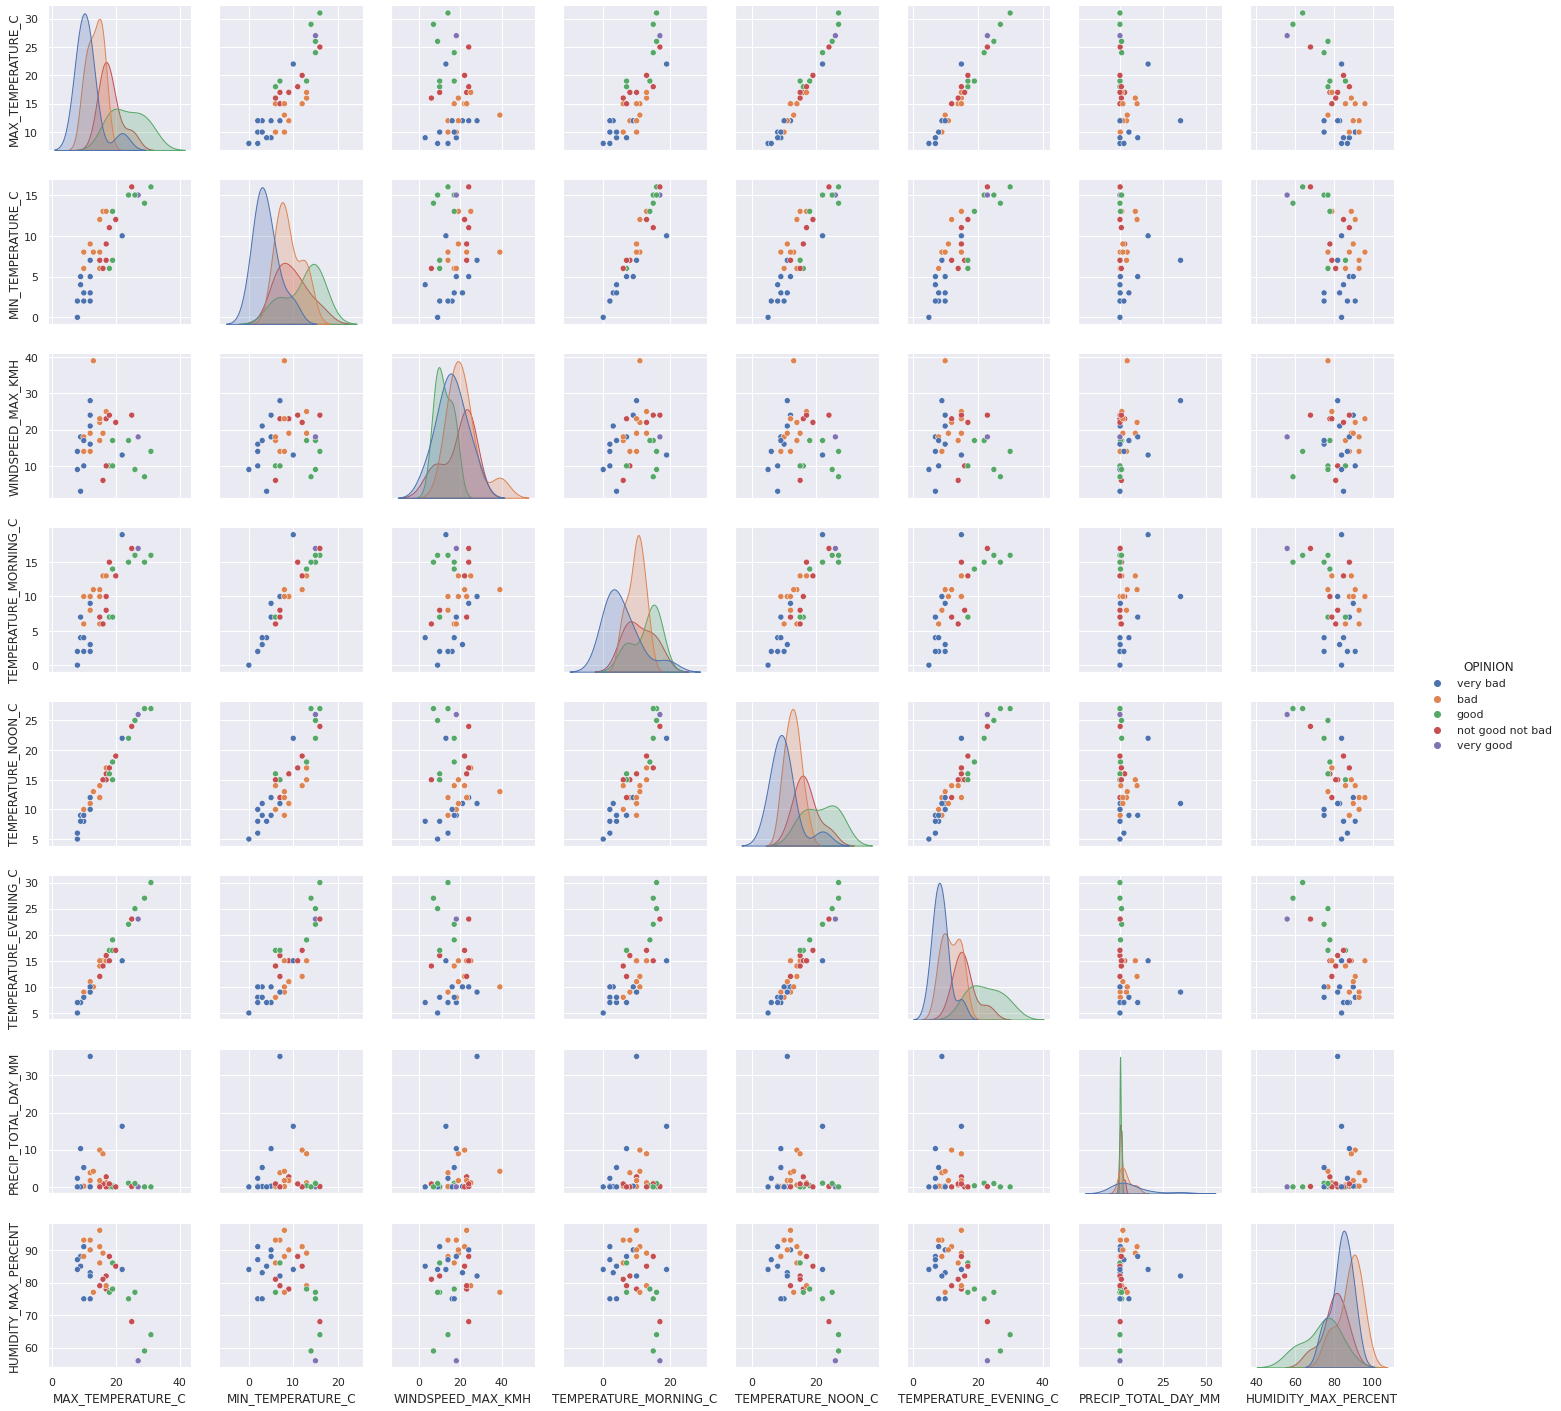

In [ ]:
#création du Pairplot - Colored by Opinion

sns.pairplot(df_weather_sample, hue='OPINION')

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

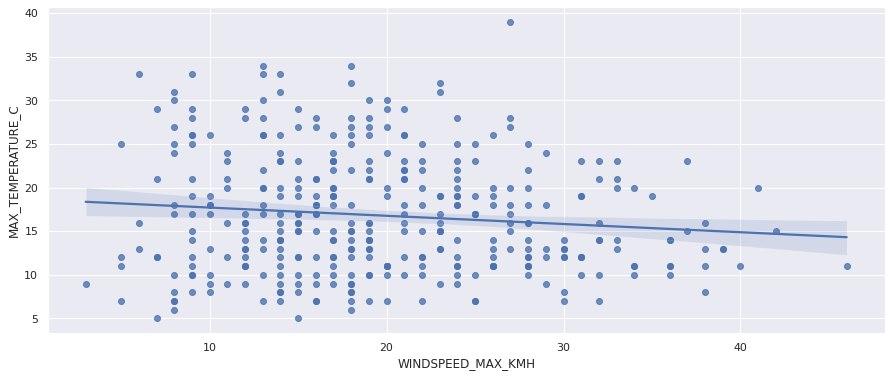

In [ ]:
#donné avec l'exercice

sns.regplot(x='WINDSPEED_MAX_KMH', y='MAX_TEMPERATURE_C', data = df_weather)
plt.show()


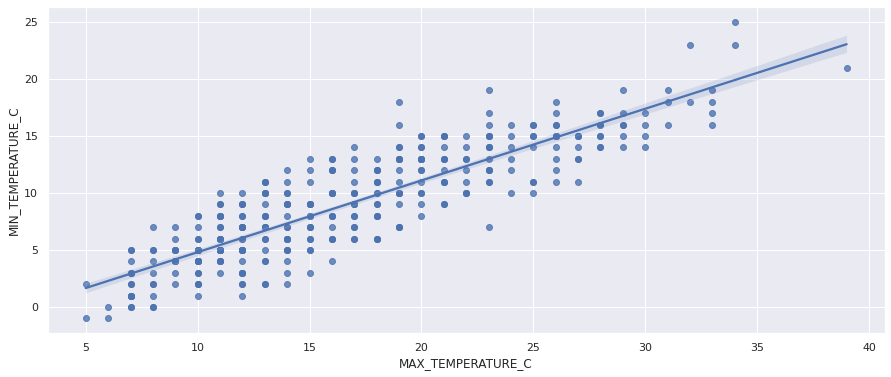

In [ ]:
# valeurs + avec le tableau de corrélation

sns.regplot(y='MIN_TEMPERATURE_C', x='MAX_TEMPERATURE_C', data = df_weather)


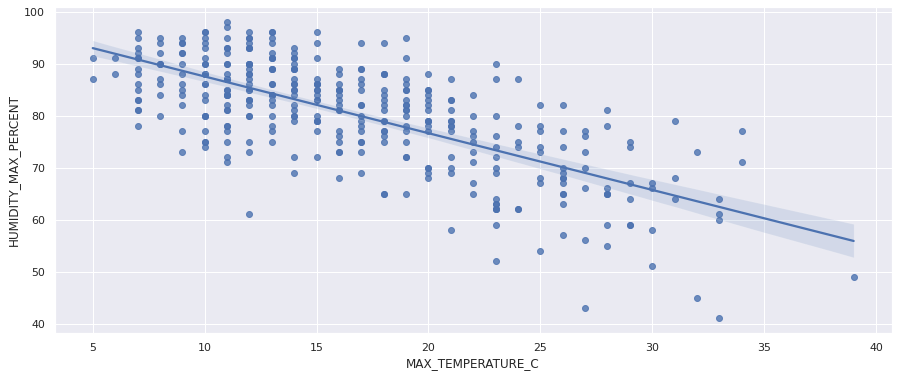

In [ ]:
# Display a regplot with a negative correlation:

sns.regplot(y='HUMIDITY_MAX_PERCENT', x='MAX_TEMPERATURE_C', data = df_weather)

# More and more...
Draw 4 different charts of your choice (you're an analyst, you have to be force of proposal), on the same figure, to represent which season has the best weather.

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


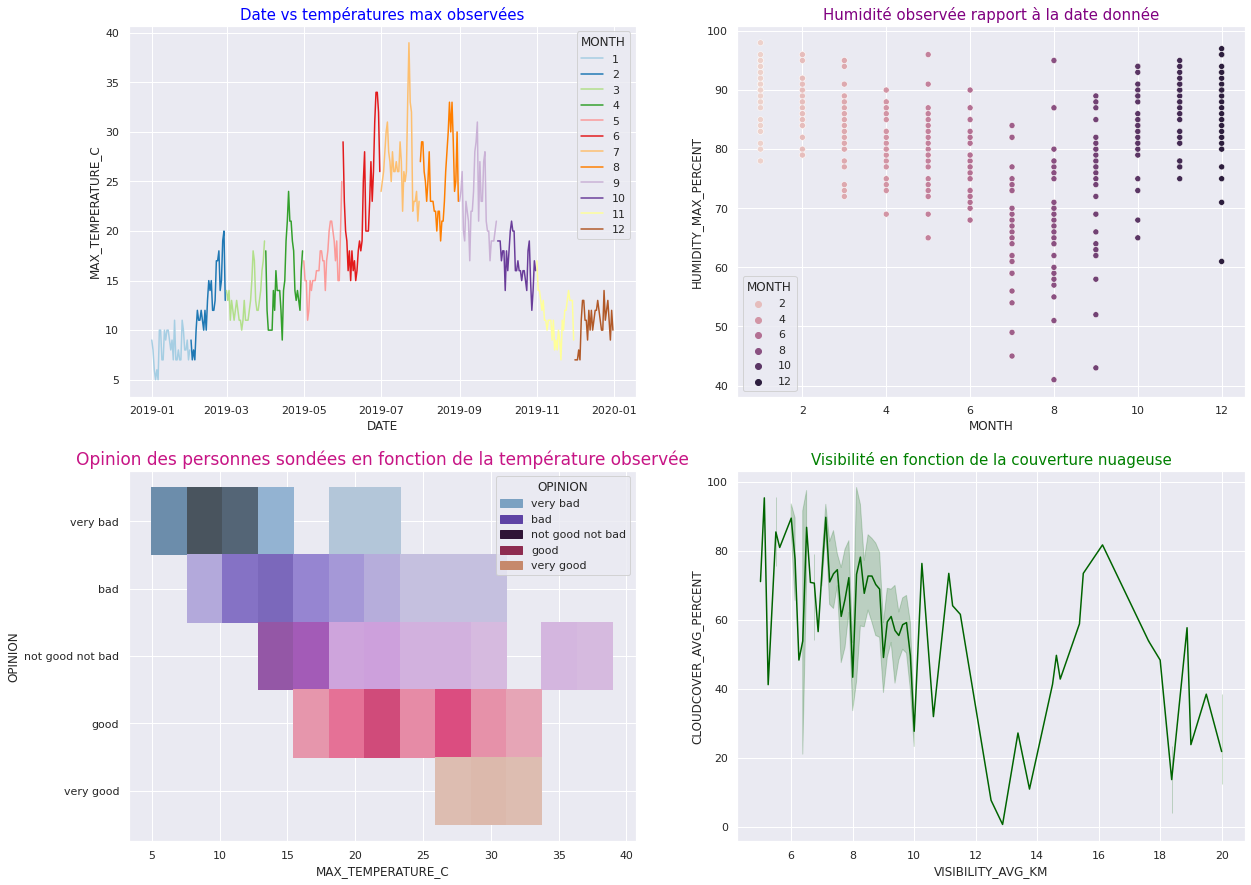

In [ ]:
#taille graph
fig, ax = plt.subplots(figsize=(20, 15))

#1ER GRAPH : comparaison entre la date et les températures max observées, colorées sur le mois
ax1 = plt.subplot(221)                       
ax1 = sns.lineplot(x = pd.to_datetime(df_weather['DATE']), y = "MAX_TEMPERATURE_C", data=df_weather, hue='MONTH', palette='Paired' ) 
ax1 = plt.title('Date vs températures max observées', size=15, c='blue')

#2EME GRAPH : comparaison entre la date et l'humidité max observée (en%), colorées sur le mois
ax2 = plt.subplot(222)
ax2 = sns.scatterplot(x = 'MONTH', y = "HUMIDITY_MAX_PERCENT", data=df_weather, hue='MONTH' ) 
ax2 = plt.title('Humidité observée rapport à la date donnée', size=15, c='purple')

#3EME GRAPH : opinions par températures observées
ax3 = plt.subplot(223)
ax3 = sns.histplot(x ='MAX_TEMPERATURE_C', y='OPINION', data=df_weather, hue='OPINION', palette='twilight' ) 
ax3 = plt.title('Opinion des personnes sondées en fonction de la température observée', size=17, c='mediumvioletred')

#4EME GRAPH : visibilité moyenne au km lors d'une couverture nuageuse plus ou moins importante
ax4 = plt.subplot(224)
ax4 = sns.lineplot(x = 'VISIBILITY_AVG_KM', y = "CLOUDCOVER_AVG_PERCENT", data=df_weather, c='darkgreen')
ax4 = plt.title('Visibilité en fonction de la couverture nuageuse', size=15, c='green')

plt.show()



# Is it summer? It seems appropriate. :) 